# <center> Clustering Project <center/>
<center> DLBDSMLUSL01 - Machine Learning : Unsupervised Learning <center/>
<center> IU International University of Applied Sciences <center/>

# Greetings
Human Resources of our company would like to mitigate mental health issues among the company’s staff through a pre-emptive program. This program will be based on this quantitative analysis of [data](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016/) resulting from anonymous surveys from people working in IT-related companies around the world.

### List of contents :
1. _Introduction_
2. _Exploratory Data Analysis (EDA)_
3. __Data Pre-processing__
4. _Clustering_
5. _Clusters Profiling_

Importing the required libraries

In [1]:
# Tools from sklearn frameworks
from sklearn.preprocessing import LabelEncoder 
from sklearn.impute import SimpleImputer

from pathlib import Path  # Path library for generating OS paths efficiently
import warnings # Handle warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Data analysis library
import numpy as np  # Python library for numerical computation 

In [2]:
# Ignoring irrelevant warnings
warnings.filterwarnings('ignore')

Loading the data.

In [3]:
# Formulating the directory 
path = Path.cwd().parent

# Loading the data
df = pd.read_csv(f'{path}/data/mental-heath-in-tech-2016_20161114.csv')

# Displaying the data
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [4]:
print(f"The data is formed through {df.shape[1]} columns/features and {df.shape[0]} rows/records.")

The data is formed through 63 columns/features and 1433 rows/records.


We'll start by renaming the columns into short names instead of large questions.

In [5]:
# Here are the new names of the columns 
new_columns_names = [
    'is_self_employed',  # Are you self-employed?
    'organization_size',  # How many employees does your company or organization have?
    'is_tech_company',  # Is your employer primarily a tech company/organization?
    'is_tech_role',  # Is your primary role within your company related to tech/IT? 
    'is_mh_benefits_provided',  # Does your employer provide mental health benefits as part of healthcare coverage?
    'is_aware_mh_care_available', # Do you know the options for mental health care available under your employer-provided coverage?
    'is_mh_discussed_by_employer', # Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
    'is_mh_resources_provided_by_employer', # Does your employer offer resources to learn more about mental health concerns and options for seeking help?
    'is_anonymity_protected', # Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
    'how_is_asking_for_medical_leave_due_to_mhi', # If a mental health issue prompted you to request a medical leave from work, asking for that leave would be 
    'is_discussing_mhd_with_employer_have_negative_consequences', # Do you think that discussing a mental health disorder with your employer would have negative consequences?
    'is_discussing_phd_with_employer_have_negative_consequences', # Do you think that discussing a physical health disorder with your employer would have negative consequences?
    'is_willing_to_discuss_mhi_with_colleagues', # Would you feel comfortable discussing a mental health disorder with your coworkers?
    'is_willing_to_discuss_mhi_with_direct_supervisor', # Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
    'is_employer_takes_mh_seriously', # Do you feel that your employer takes mental health as seriously as physical health?
    # Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
    'is_aware_of_previous_negative_consequence_of_colleagues_with_mhi',
    # Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?
    'have_medical_coverage_includes_mental_health_issue',
    # Do you know local or online resources to seek help for a mental health disorder?
    'know_how_to_seek_help',
    # If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?
    'is_able_to_reveal_previous_mental_health_issue_to_business_contacts',
    # If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?
    'is_impacted_negatively_1',
    # If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?
    'is_able_to_reveal_previous_mental_health_issue_to_coworkers',
    # If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?
    'is_impacted_negatively_2',
    # Do you believe your productivity is ever affected by a mental health issue?
    'is_productivity_impacted',
    # If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?
    'percentage_impacted',
    # Do you have previous employers?
    'is_previously_employed',
    # Have your previous employers provided mental health benefits?
    'is_previous_employer_provides_mh_benefits',
    # Were you aware of the options for mental health care provided by your previous employers?
    'is_aware_mh_options_by_previous_employer',
    # Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
    'is_mh_discussed_by_previous_employer',
    # Did your previous employers provide resources to learn more about mental health issues and how to seek help?
    'is_mh_resources_provided_by_previous_employer',
    # Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
    'is_anonymity_protected_by_previous_employer',
    # Do you think that discussing a mental health disorder with previous employers would have negative consequences?
    'is_discussing_mhd_with_previous_employer_have_negative_consequences',
    # Do you think that discussing a physical health disorder with previous employers would have negative consequences?
    'is_discussing_phd_with_previous_employer_have_negative_consequences',
    # Would you have been willing to discuss a mental health issue with your previous co-workers?
    'is_willing_to_discuss_mhi_with_previous_colleagues',
    # Would you have been willing to discuss a mental health issue with your direct supervisor(s)?
    'is_willing_to_discuss_mhi_with_previous_direct_supervisor',
    # Did you feel that your previous employers took mental health as seriously as physical health?
    'is_previous_employer_takes_mh_seriously',
    # Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?
    'is_aware_of_previous_negative_consequence_of_colleagues_with_mhi_in_previous_workplace',
    'is_willing_to_bring_phi_in_interview', # Would you be willing to bring up a physical health issue with a potential employer in an interview?
    'why_or_why_not_bring_phi_in_interview',  # Why or why not?
    'is_willing_to_bring_mhi_in_interview', # Would you bring up a mental health issue with a potential employer in an interview?
    'why_or_why_not_bring_mhi_in_interview',  # Why or why not?
    'is_being_identified_with_mhi_would_hurt_your_career', # Do you feel that being identified as a person with a mental health issue would hurt your career?
    'is_being_identified_with_mhi_would_lower_your_status_among_colleagues', # Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
    'is_wiling_to_share_about_mhi', # How willing would you be to share with friends and family that you have a mental illness?
    # Have you observed or experienced an unsupported or badly handled response to a mental health issue in your current or previous workplace?
    'previously_observed_experienced_response_to_mhi',
    # Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?
    'is_less_encouraged_to_reveal_mhi',
    'family_history_of_mhi',  # Do you have a family history of mental illness?
    'previous_history_of_mhi',  # Have you had a mental health disorder in the past?
    'is_having_mhd',  # Do you currently have a mental health disorder?
    'known_conditions',  # If yes, what condition(s) have you been diagnosed with?
    'suspected_conditions',  # If maybe, what condition(s) do you believe you have?
    'diagnosed_by_professional',  # Have you been diagnosed with a mental health condition by a medical professional?
    'diagnosed_conditions_by_professional',  # If so, what condition(s) were you diagnosed with?
    'is_sought_treatment_for_mhi', # Have you ever sought treatment for a mental health issue from a mental health professional?
    'is_mhi_interferes_with_your_work_when_treated_effectively', # If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?
    'is_mhi_does_not_interfere_with_your_work_when_treated_effectively', # If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?
    'age',  # What is your age? 
    'gender',  # What is your gender?
    'country_of_residency',  # What country do you live in?'
    'us_state_residency',  # What US state or territory do you live in?
    'country_of_work',  # What country do you work in?
    'us_state_work',  # What US state or territory do you work in?
    'role_description',  # Which of the following best describes your work position?
    'is_remote'  # Do you work remotely?
]

# Setting the columns names in df
df.columns = new_columns_names

# Preview the data
df.head()

,is_self_employed,organization_size,is_tech_company,is_tech_role,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,...,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,us_state_residency,country_of_work,us_state_work,role_description,is_remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes



## 3. Data Pre-processing

#### 3.1. Handling the missing data
The dataset contains missing data that needs to be addressed by either dropping those records or properly filling in the missing values.

In [6]:
# Drop columns with many empty values
df.drop(df.columns[list(df.isna().sum() >= 580)], axis=1, inplace=True)

# Preview the new shape of our data
print(f"The data is formed through {df.shape[1]} columns/features and {df.shape[0]} rows/records.")

The data is formed through 48 columns/features and 1433 rows/records.


Then, we'll proceed to fill the remaining missing data with the most frequent entries.

In [7]:
# Assigning the SimpleImputer to replace with the most frequent entries
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Applying the imputation
imputed_data = imp.fit_transform(df)

# Creating the cleaned dataframe: cleaned_df
cleaned_df = pd.DataFrame(data=imputed_data, columns=df.columns)

# View the data
cleaned_df.head()

,is_self_employed,organization_size,is_tech_company,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,is_discussing_mhd_with_employer_have_negative_consequences,...,diagnosed_by_professional,is_sought_treatment_for_mhi,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,country_of_work,role_description,is_remote
0,0,26-100,1.0,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,...,Yes,0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,United Kingdom,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Yes,1,Rarely,Sometimes,29,male,United States of America,United States of America,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,...,No,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,United Kingdom,Back-end Developer,Always
3,1,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,Yes,1,Sometimes,Sometimes,43,male,United Kingdom,United Kingdom,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Yes,1,Sometimes,Sometimes,43,Female,United States of America,United States of America,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


#### 3.2. Data Cleaning
Many problems were discovered within the dataset such as missing and erroneous data and even inadequate data for our case study. In this phase, we proceed to clean the data for a smooth clustering in the next phases.

Let's start with the countries and leave only countries with more than 40 employees.

In [8]:
# Select the major countries with more than 20 respondents 
major_countries = ["United States of America", "United Kingdom", "Canada", "Germany", "Netherlands", "Australia"]

# Replace the names of small countries with a generalized category
cleaned_df.loc[~cleaned_df['country_of_residency'].isin(major_countries), 'country_of_residency'] = 'Other'
cleaned_df.loc[~cleaned_df['country_of_work'].isin(major_countries), 'country_of_work'] = 'Other'

In [9]:
cleaned_df["country_of_work"].value_counts()

country_of_work
United States of America    851
Other                       186
United Kingdom              183
Canada                       74
Germany                      58
Netherlands                  47
Australia                    34
Name: count, dtype: int64

Then, we'll convert the floating values into integers for more data consistency.

In [10]:
# Convert the floats into integers
cleaned_df["is_tech_company"] = cleaned_df["is_tech_company"].astype('int')

# Preview the changes
cleaned_df["is_tech_company"].value_counts()

is_tech_company
1    1170
0     263
Name: count, dtype: int64

In the next section, we'll proceed to eliminate redundancy into three unique values in the gender column

In [11]:
# Reassigning the values to Male, Female, or Other
cleaned_df['gender'].replace(
    ['male', 'm', 'M', 'Male (cis)', 'cisdude', 'Dude', 'Male.', 'Cis male', 'Cis Male', 'cis male', 'cis man', 'mail', 'Male (trans, FtM)',
     'Male (trans, FtM)', 'Male/genderqueer', 'Malr', 'Man', 'Sex is male', 'man', 'male ', 'M|', 'Male ', 'MALE',
     'I\'m a man why didn\'t you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? '
     ],
    'Male', inplace=True)

cleaned_df['gender'].replace(
    ['Female', 'female', 'I identify as female.', 'female ', 'Female assigned at birth ', 'Cis female ', 'F', 'Woman', 'Transitioned, M2F', 'woman', 'female/woman', 
     'Cisgender Female', 'fm', 'f', 'Female or Multi-Gender Femme', 'fem', ' Female', 'Cis-woman', 'Female ', 'Female (props for making this a freeform field, though)',
     ],
    'Female', inplace=True)

cleaned_df['gender'].replace(
    ['Genderfluid (born female)', 'female-bodied; no feelings about gender', 'non-binary', 'AFAB', 'Agender', 'genderqueer', 'Genderflux demi-girl', 'mtf', 'Genderqueer', 
     'Transgender woman', 'Other/Transfeminine', 'human', 'Queer', 'Unicorn', 'Androgynous', 'Fluid', 'nb masculine', 'Genderfluid', 'none of your business', 'Bigender', 
     'Enby', 'genderqueer woman', 'Nonbinary', 'male 9:1 female, roughly', 'Human', np.nan
     ],
    'Other', inplace=True)

# Overview of the transformed data
cleaned_df["gender"].value_counts()

gender
Male      1062
Female     340
Other       31
Name: count, dtype: int64

Next, the multiple entries in the role description column can benefit from an appropriate categorization. We'll be basing this categorization on the first entry since it's more likely to be the main role of the respondent. 

In [12]:
def classifier(dataframe, column_name, categories_dict):
    """
    Replace a multiple choices entry with a dedicated category 
    :param dataframe: pandas dataframe
    :param column_name: the column pf interest from the dataframe
    :param categories_dict: the dictionary of categories
    :return: None
    """
    # Initiate a for loop
    for element in dataframe[column_name].unique():
        
        # Splitting the entries
        for part in element.split("|"):
            
            # Iterating over the dictionary of categories  
            for k, v in categories_dict.items():
                
                # Check the first word only
                if part in v :
                    dataframe[column_name].replace(element, k, inplace=True)
                    break
    return "Done!"

In [13]:
# Getting required roles
roles_categories = {
    "IT": ["Back-end Developer", "Front-end Developer", "DevOps/SysAdmin"],
    "Management": ["Supervisor/Team Lead","Executive Leadership"],
    "Advocacy": ["Dev Evangelist/Advocate"],
    "One-person shop":["One-person shop"],
    "Support": ["Support"],
    "Design": ["Designer"],
    "Sales": ["Sales"],
    "Other": ["Other"],
    "HR": ['HR']
}

# Apply the function classifier
classifier(dataframe=cleaned_df, column_name='role_description', categories_dict=roles_categories)

# Check results
cleaned_df["role_description"].value_counts()

role_description
IT                 743
Management         250
Other              166
One-person shop    104
Support             63
Advocacy            50
Design              45
HR                   7
Sales                5
Name: count, dtype: int64

As we were able to see in the previous phase, unusual entries were detected in the age column. These entries are replaced by the mean of the list of entries containing usual values.

In [14]:
# Arranging a list of accepted entries
age_entries = [element for element in cleaned_df["age"].to_list() if 18 < element <= 65]

# Getting the mean
age_mean = np.median(age_entries)

# Replacing unusual entries with age_mean
cleaned_df.loc[(cleaned_df['age'] > 65), 'age'] = cleaned_df.loc[(df['age'] < 18), 'age'] = age_mean

Now, an appropriate view of the age distribution can be possible.

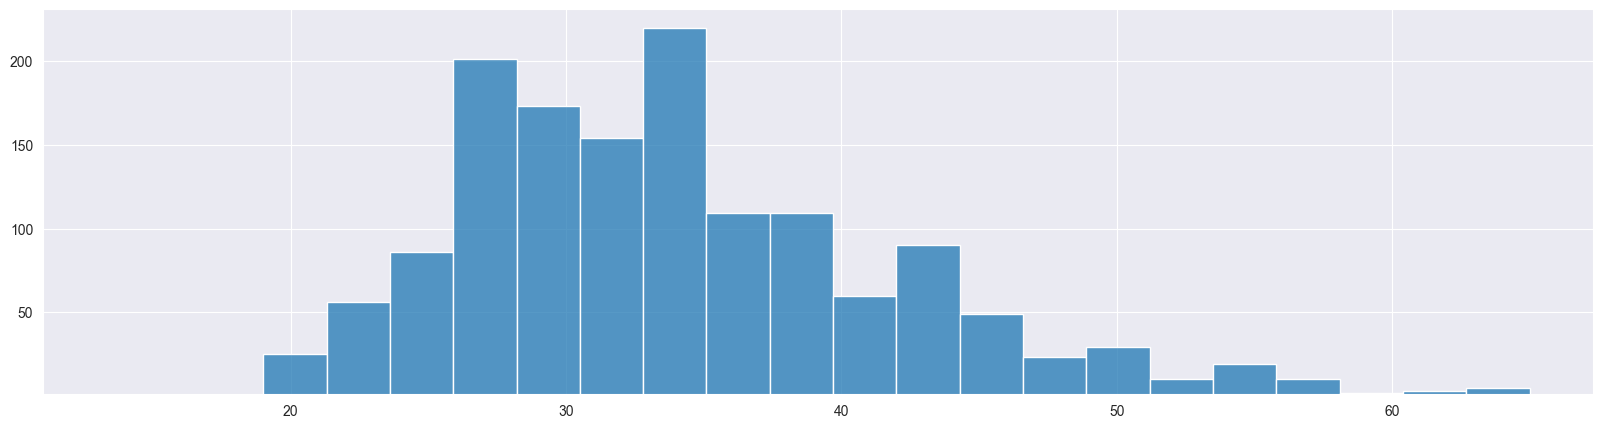

In [15]:
# Create a figure and specifying its size
plt.figure(figsize=(20,5))

# Plot the histogram of the age distribution 
sns.histplot(x='age', data=cleaned_df, bins=20)

# Set labels for the axes
plt.xlabel('')
plt.ylabel('')

# Setting the axes' limits
plt.xlim(11, None)
plt.ylim(1, None)

# Saving the figures
plt.savefig(f'{path}/assets/Fig09 - The true age distribution.png', bbox_inches='tight', dpi=300)

According to the histogram, we can categorize these entries into five categories.

In [16]:
# Getting the age list
age_list = cleaned_df["age"].to_list()

# Define age categories
age_categories = {
    "Before 20s": list(range(18, 20)),
    "20s": list(range(20, 30)),
    "30s": list(range(30, 40)),
    "40s": list(range(40, 50)),
    "Above 50s": list(range(50, 80))
}

# Initiate a for-loop 
for age in age_list :
    for key, values in age_categories.items():
        if age in values:
            cleaned_df["age"].replace(age, key, inplace=True)

# Count values in the age group
cleaned_df['age'].value_counts()

age
30s           686
20s           443
40s           235
Above 50s      65
Before 20s      4
Name: count, dtype: int64

Finally, there are many reasons to bring or never bring physical/mental health issues in a job interview. 

Since it's more likely to mistake classify a response because there's a key word in it, I made sure to classify the 1433 responses manually based on the meaning they convey.

In [17]:
# Load the classified data 
classified_df = pd.read_csv(f'{path}/data/data_v0.5.csv')

# See the first 5 rows
classified_df.head()

,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1
0,Maybe,Bias and Discrimination,Maybe,Bias and Discrimination
1,Maybe,Low hiring chances,No,Bias and Discrimination
2,Yes,Transparency and Integrity,Yes,Bias and Discrimination
3,Yes,Performance-related Concerns,Maybe,Negative impact on the outcome
4,Maybe,Bias and Discrimination,No,Other


We then plug the new categories in the dataset

In [18]:
# Replace the old entries with the new categories
cleaned_df['why_or_why_not_bring_phi_in_interview'] = classified_df["Why or why not?"]
cleaned_df['why_or_why_not_bring_mhi_in_interview'] = classified_df["Why or why not?.1"]

As we conclude our data wrangling, this version of data will be saved as backup.

In [19]:
# Save the cleansed dataset in the respective directory
cleaned_df.to_csv(f"{path}/data/data_v1.0.csv", index=False)

### 3.3 Feature Encoding
The First step into clustering is encoding features into numerical values based on the categories available. 

In [20]:
# Copy the dataset
encoded_df = cleaned_df.copy()

# Initiate a label encoder instance
le = LabelEncoder()

# Apply label encoding 
for column in encoded_df.columns:
    encoded_df[column] = le.fit_transform(encoded_df[column].astype(str))

# Preview the new dataset
encoded_df.head()

,is_self_employed,organization_size,is_tech_company,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,is_discussing_mhd_with_employer_have_negative_consequences,...,diagnosed_by_professional,is_sought_treatment_for_mhi,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,country_of_work,role_description,is_remote
0,0,2,1,2,1,1,1,0,5,1,...,1,0,1,1,1,1,5,5,3,2
1,0,4,1,1,2,2,2,2,3,1,...,1,1,3,4,0,1,6,6,3,1
2,0,4,1,1,1,1,1,0,1,0,...,0,1,1,1,1,1,5,5,3,0
3,1,2,1,3,1,1,1,0,3,0,...,1,1,4,4,2,1,5,5,4,2
4,0,4,0,3,2,1,1,1,1,2,...,1,1,4,4,2,0,6,6,4,2


In [21]:
# Save the cleansed dataset in the respective directory
encoded_df.to_csv(f"{path}/data/data_v2.0.csv", index=False)

### 3.4 Correlation analysis
This step aims to remove highly correlated features since it carries the same information.

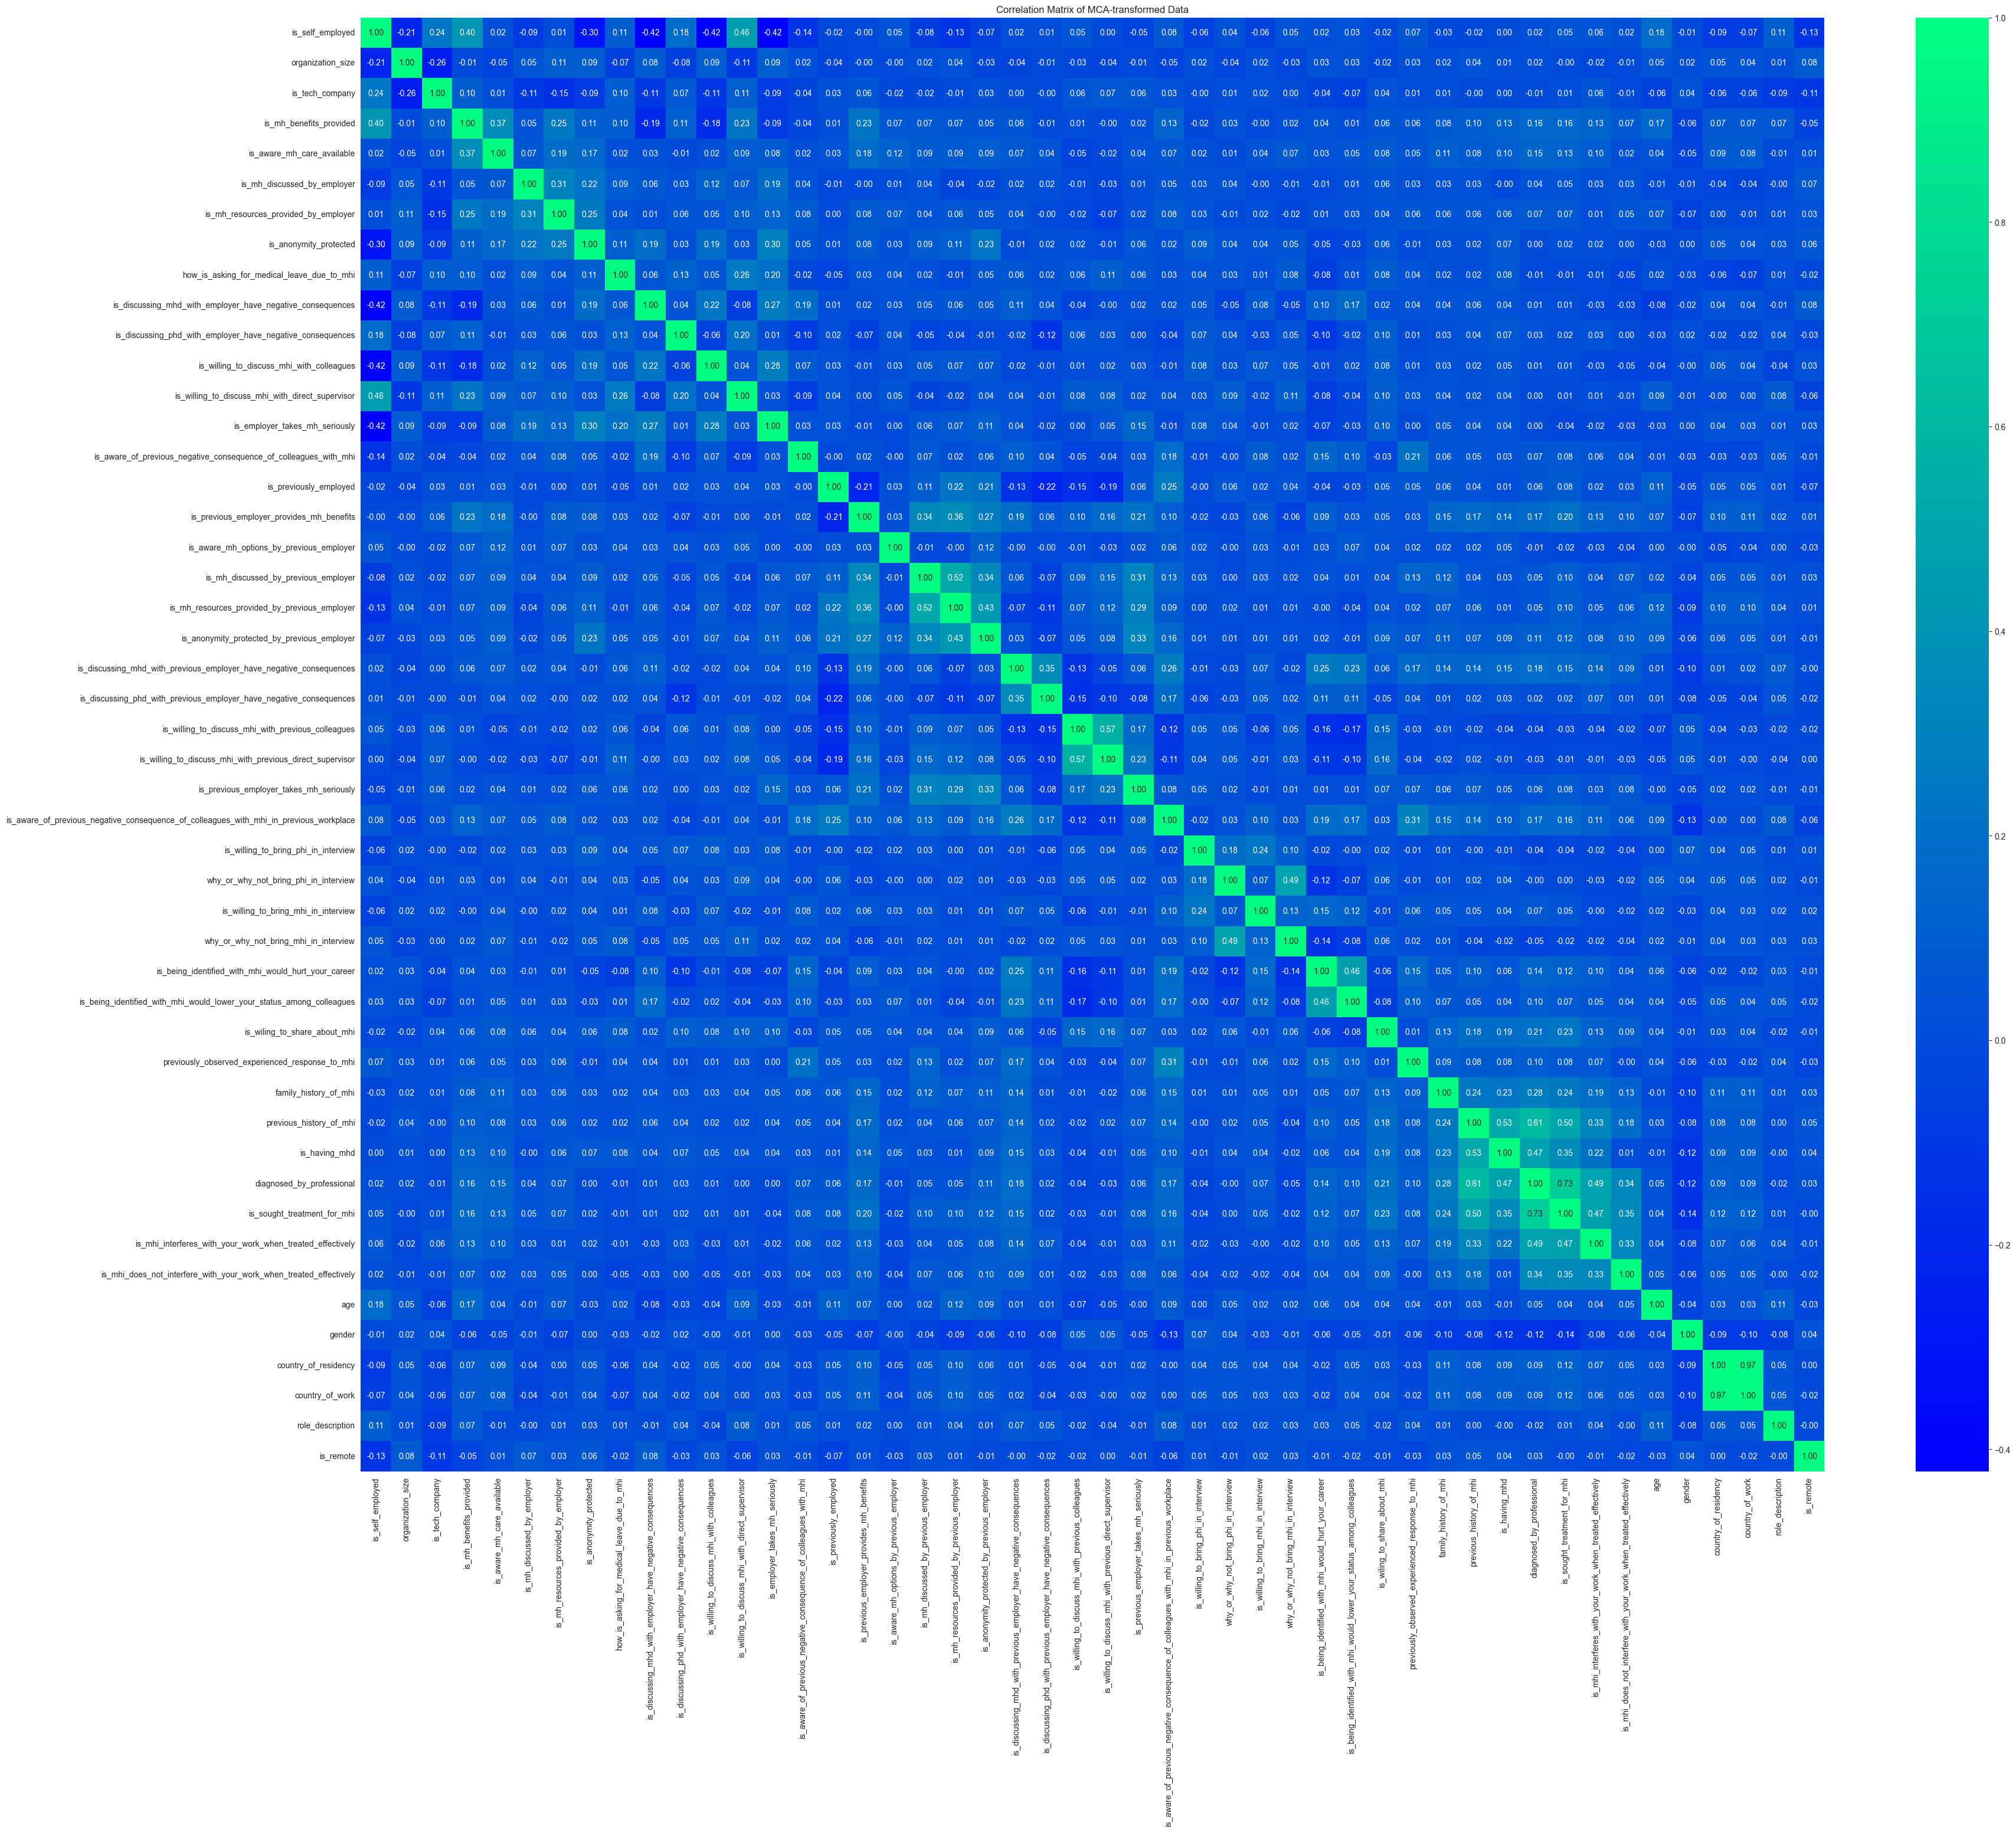

In [22]:
# Create a figure with a specified size
plt.figure(figsize=(40, 32))

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Plot the correlation matrix using Seaborn's heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='winter', fmt=".2f")

# Set the title of the plot
plt.title('Correlation Matrix of MCA-transformed Data')

# Show the plot
plt.savefig(f'{path}/assets/Fig10 - The correlation matrix.png', bbox_inches='tight', dpi=300)
plt.show()

In [23]:
# Fix a threshold to .9
threshold = 0.9

# Initiate a list to preview the deleted columns 
deleted = []

# Loop through each column index of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    # Loop through each row index up to the current column index
    for j in range(i):
        # Check if the absolute correlation value is greater than the threshold
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            # Drop columns i and j from the encoded DataFrame
            encoded_df.drop(columns=[correlation_matrix.columns[i], correlation_matrix.columns[j]], inplace=True)
            
            # Store the deleted columns 
            deleted.append(correlation_matrix.columns[i])
            deleted.append(correlation_matrix.columns[j])

# Preview the deleted items
print(deleted)

['country_of_work', 'country_of_residency']


In [24]:
# Preview the new shape of our data
print(f"The data is formed through {encoded_df.shape[1]} columns/features and {encoded_df.shape[0]} rows/records.")

The data is formed through 46 columns/features and 1433 rows/records.


In [25]:
# Save the cleansed dataset in the respective directory
encoded_df.to_csv(f"{path}/data/data_v2.1.csv", index=False)

## Summary

In this notebook, we discussed the following aspects :
- This phase has increased data consistency and eliminates all of its flaws. 
- The feature encoding and the correlation analysis are crucial aspects to improve the model accuracy. 

## Author
<a href="https://www.linkedin.com/in/ab0858s/">Abdelali BARIR</a> is a former veteran in the Moroccan's Royal Armed Forces, and a self-taught data scientist. Currently enrolled in B.Sc. Data Science in __IU International University of Applied Sciences__.

## Change Log
| Date         | Version | Changed By     | Change Description      |
|--------------|---------|----------------|-------------------------|
| 2024-07-10   | 1.0     | Abdelali Barir | Modified markdown       |
| ------------ |---------|----------------|-------------------------|